### Baseline for hse nlp project, Dmitriy Lyalin.

In [1]:
import numpy as np
import pandas as pd
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import TfidfVectorizer

In [2]:
df_train = pd.read_parquet('/kaggle/input/hse-nlp-data-for-baseline/df_train.pq')
df_test = pd.read_parquet('/kaggle/input/hse-nlp-data-for-baseline/df_test.pq')

In [3]:
df_train.head(2)

,author,text_,cnt_sent,text_len,text,text_len2,words_cnt,wrds_sent_cnt,cnt_words_unique,unwords_words,...,cnt_punct_frq,lex_div,tfidf_keywords,pos_frq,pos_cnt,ent_frq,ent_cnt,uchars_frq,uchars_cnt,fk_score
0,William_Shakespeare,THE LIFE AND DEATH OF KING RICHARD III by Will...,3219,174276,THE LIFE AND DEATH OF KING RICHARD III by Will...,164529,31029,9.639329,4844,0.156112,...,"{'!': 353, '""': 62.0, '#': None, '$': None, '%...",0.156095,gloster,"{'CC': 1200, 'CD': 88, 'DT': 2026, 'EX': 28, '...",33,"{'CARDINAL': 70, 'DATE': 78, 'EVENT': 0, 'FAC'...",14,"{'A': 1478, 'B': 606, 'C': 850, 'D': 562, 'E':...",52,6.0
1,William_Faulkner,"Absalom, Absalom! William Faulkner —1— From a ...",3351,721321,Absalom Absalom William Faulkner —— From a lit...,704116,133926,39.965980,9632,0.071920,...,"{'!': 91, '""': 803.0, '#': None, '$': 1.0, '%'...",0.071499,sutpen,"{'CC': 8474, 'CD': 1154, 'DT': 12430, 'EX': 31...",33,"{'CARDINAL': 652, 'DATE': 771, 'EVENT': 12, 'F...",17,"{'A': 432, 'B': 702, 'C': 536, 'D': 119, 'E': ...",51,16.8


In [4]:
df_train.head(2)

,author,text_,cnt_sent,text_len,text,text_len2,words_cnt,wrds_sent_cnt,cnt_words_unique,unwords_words,...,cnt_punct_frq,lex_div,tfidf_keywords,pos_frq,pos_cnt,ent_frq,ent_cnt,uchars_frq,uchars_cnt,fk_score
0,William_Shakespeare,THE LIFE AND DEATH OF KING RICHARD III by Will...,3219,174276,THE LIFE AND DEATH OF KING RICHARD III by Will...,164529,31029,9.639329,4844,0.156112,...,"{'!': 353, '""': 62.0, '#': None, '$': None, '%...",0.156095,gloster,"{'CC': 1200, 'CD': 88, 'DT': 2026, 'EX': 28, '...",33,"{'CARDINAL': 70, 'DATE': 78, 'EVENT': 0, 'FAC'...",14,"{'A': 1478, 'B': 606, 'C': 850, 'D': 562, 'E':...",52,6.0
1,William_Faulkner,"Absalom, Absalom! William Faulkner —1— From a ...",3351,721321,Absalom Absalom William Faulkner —— From a lit...,704116,133926,39.965980,9632,0.071920,...,"{'!': 91, '""': 803.0, '#': None, '$': 1.0, '%'...",0.071499,sutpen,"{'CC': 8474, 'CD': 1154, 'DT': 12430, 'EX': 31...",33,"{'CARDINAL': 652, 'DATE': 771, 'EVENT': 12, 'F...",17,"{'A': 432, 'B': 702, 'C': 536, 'D': 119, 'E': ...",51,16.8


Проверим, одинаковые ли у нас колонки в трейне и тесте.

In [5]:
set(df_train.columns) - set(df_test.columns)

set()

In [6]:
set(df_test.columns) - set(df_train.columns)

set()

In [7]:
df_train.columns

Index(['author', 'text_', 'cnt_sent', 'text_len', 'text', 'text_len2',
       'words_cnt', 'wrds_sent_cnt', 'cnt_words_unique', 'unwords_words',
       'median_word_length', 'mean_word_length', 'max_word_length',
       'words_symbols', 'words_dots', 'words_commas', 'words_excls',
       'words_questions', 'words_semicolons', 'words_colons', 'words_dashs',
       'words_aposts', 'words_ellipsis', 'words_quots', 'cnt_adv_freq',
       'cnt_swadesh_freq', 'cnt_word_eng', 'prc_wrds_not_eng', 'uniq_word_cnt',
       'cnt_punct_frq', 'lex_div', 'tfidf_keywords', 'pos_frq', 'pos_cnt',
       'ent_frq', 'ent_cnt', 'uchars_frq', 'uchars_cnt', 'fk_score'],
      dtype='object')

In [8]:
pd.set_option('display.max_columns', None)

In [9]:
df_train.head(2)

,author,text_,cnt_sent,text_len,text,text_len2,words_cnt,wrds_sent_cnt,cnt_words_unique,unwords_words,median_word_length,mean_word_length,max_word_length,words_symbols,words_dots,words_commas,words_excls,words_questions,words_semicolons,words_colons,words_dashs,words_aposts,words_ellipsis,words_quots,cnt_adv_freq,cnt_swadesh_freq,cnt_word_eng,prc_wrds_not_eng,uniq_word_cnt,cnt_punct_frq,lex_div,tfidf_keywords,pos_frq,pos_cnt,ent_frq,ent_cnt,uchars_frq,uchars_cnt,fk_score
0,William_Shakespeare,THE LIFE AND DEATH OF KING RICHARD III by Will...,3219,174276,THE LIFE AND DEATH OF KING RICHARD III by Will...,164529,31029,9.639329,4844,0.156112,4.0,4.30,18,0.188593,12.406637,9.850476,87.900850,85.244505,55.508050,83.411290,30.874627,34.785874,inf,500.467742,"{'always': 1, 'never': 33, 'normally': 0, 'occ...","{'I': 0, 'all': 137, 'and': 928, 'animal': 0, ...",2822,0.582576,"{'0': None, '00': None, '0000': None, '000chea...","{'!': 353, '""': 62.0, '#': None, '$': None, '%...",0.156095,gloster,"{'CC': 1200, 'CD': 88, 'DT': 2026, 'EX': 28, '...",33,"{'CARDINAL': 70, 'DATE': 78, 'EVENT': 0, 'FAC'...",14,"{'A': 1478, 'B': 606, 'C': 850, 'D': 562, 'E':...",52,6.0
1,William_Faulkner,"Absalom, Absalom! William Faulkner —1— From a ...",3351,721321,Absalom Absalom William Faulkner —— From a lit...,704116,133926,39.965980,9632,0.071920,4.0,4.26,18,0.190204,46.245166,17.545657,1471.714286,365.918033,166.990025,180.250336,282.544304,61.265325,inf,166.782067,"{'always': 26, 'never': 261, 'normally': 1, 'o...","{'I': 0, 'all': 595, 'and': 6442, 'animal': 7,...",6437,0.668293,"{'0': None, '00': None, '0000': None, '000chea...","{'!': 91, '""': 803.0, '#': None, '$': 1.0, '%'...",0.071499,sutpen,"{'CC': 8474, 'CD': 1154, 'DT': 12430, 'EX': 31...",33,"{'CARDINAL': 652, 'DATE': 771, 'EVENT': 12, 'F...",17,"{'A': 432, 'B': 702, 'C': 536, 'D': 119, 'E': ...",51,16.8


Проверим, что все авторы из теста есть в трейне.

In [10]:
df_train.author.nunique()

100

In [11]:
df_test.author.nunique()

51

In [12]:
len(set(df_train.author) - set(df_test.author))

50

In [13]:
len(set(df_test.author) - set(df_train.author))

1

In [14]:
set(df_test.author) - set(df_train.author)

{'Graf_Leo_Tolstoy'}

In [15]:
df_test[~(df_test.author == 'Graf_Leo_Tolstoy')].shape

(50, 39)

In [16]:
df_test = df_test[~(df_test.author == 'Graf_Leo_Tolstoy')]

<Axes: >

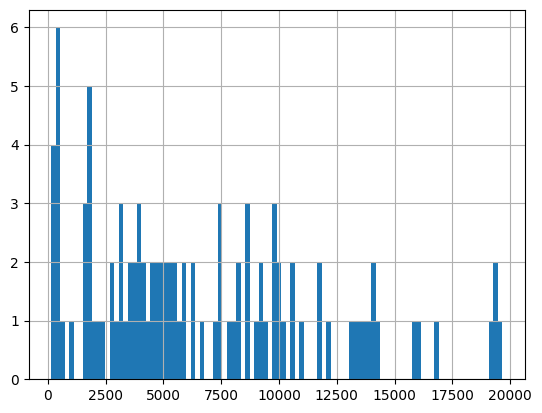

In [17]:
df_train.cnt_sent.hist(bins=100)

In [18]:
df_test.cnt_sent

0       772
1      5189
2      6597
3      2974
4      4395
5      1154
6       935
7       237
8       884
9      4927
10     6714
11     5091
12    14316
13     7536
14     1678
15     3568
17     3278
18     3136
19     5803
20    16724
21      922
22     4754
23     6194
24     2100
25     5835
26     6628
27     6038
28      142
29     3667
30      360
31     2900
32     5124
33      522
34     8139
35     4604
36     4158
37     2122
38      172
39     5068
40      440
41      271
42     3812
43    11867
44     2093
45    12456
46     9789
47    13078
48     9751
49     9301
50    11011
Name: cnt_sent, dtype: int64

<Axes: >

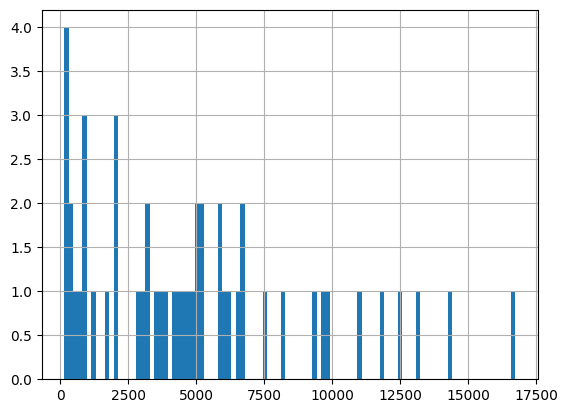

In [19]:
df_test.cnt_sent.hist(bins=100)

In [20]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 39 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   author              100 non-null    object 
 1   text_               100 non-null    object 
 2   cnt_sent            100 non-null    int64  
 3   text_len            100 non-null    int64  
 4   text                100 non-null    object 
 5   text_len2           100 non-null    int64  
 6   words_cnt           100 non-null    int64  
 7   wrds_sent_cnt       100 non-null    float64
 8   cnt_words_unique    100 non-null    int64  
 9   unwords_words       100 non-null    float64
 10  median_word_length  100 non-null    float64
 11  mean_word_length    100 non-null    float64
 12  max_word_length     100 non-null    int64  
 13  words_symbols       100 non-null    float64
 14  words_dots          100 non-null    float64
 15  words_commas        100 non-null    float64
 16  words_exc

In [21]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, 0 to 50
Data columns (total 39 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   author              50 non-null     object 
 1   text_               50 non-null     object 
 2   cnt_sent            50 non-null     int64  
 3   text_len            50 non-null     int64  
 4   text                50 non-null     object 
 5   text_len2           50 non-null     int64  
 6   words_cnt           50 non-null     int64  
 7   wrds_sent_cnt       50 non-null     float64
 8   cnt_words_unique    50 non-null     int64  
 9   unwords_words       50 non-null     float64
 10  median_word_length  50 non-null     float64
 11  mean_word_length    50 non-null     float64
 12  max_word_length     50 non-null     int64  
 13  words_symbols       50 non-null     float64
 14  words_dots          50 non-null     float64
 15  words_commas        50 non-null     float64
 16  words_excls    

Baseline просили сделать по этой схеме (ее и будем придерживаться):  
Построение бейзлайна для NLP.  
Стоит начать с минимального бейзлайна - случайное предсказание/предсказание самого частого класса, чтобы потом ориентироваться на эти значения при оценке других подходов.
Добавляем возможные эвристики:  
● Lexicon-based: использование словарей, например, для тональности и токсичности;  
● Rule-based: правила для известных паттернов: ключевые слова, регулярные выражения, счетчики
положительных/отрицательных слов, длина текста и среднего количества слов в предложении, формулы для оценки сложности текста (например, Flesch-Kincaid), детекция простых шаблонов и специфических фраз, определение разнообразия словарного запаса и структуры текста.  
Далее статистические подходы + моделька:  
● BoW / TF-IDF + LogReg / SVM: классификация на основе ключевых слов;  
● N-grams + Naive Bayes: учет последовательности слов.  
Создание эмбеддингов + обучение простой модели:  
● Word2Vec / GloVe + LogReg / Linear Classifier / SVM  
Можно попробовать комбинации (ensemble) простых моделей для повышения точности.  

Эвристики уже набросал наш коллега Витайлий, поэтому сосредоточимся на других методах.

In [22]:
X_train = df_train['text']
y_train = df_train['author']
X_test = df_test['text']
y_test = df_test['author']

In [23]:
y_train

0      William_Shakespeare
1         William_Faulkner
2           Virginia_Woolf
3              Victor_Hugo
4         Ursula_K_Le_Guin
              ...         
95           Aldous_Huxley
96            Albert_Camus
97    Ahmet_Hamdi_Tanpinar
98         Agatha_Christie
99                   Aesop
Name: author, Length: 100, dtype: object

In [24]:
# 1. Random baseline
random_baseline = DummyClassifier(strategy='uniform', random_state=42)
random_baseline.fit(X_train, y_train)
random_preds = random_baseline.predict(X_test)
random_acc = accuracy_score(y_test, random_preds)
random_acc

0.02

Слабовато.

In [25]:
# 2. Most frequent class baseline
most_freq_baseline = DummyClassifier(strategy='most_frequent')
most_freq_baseline.fit(X_train, y_train)
most_freq_preds = most_freq_baseline.predict(X_test)
most_freq_acc = accuracy_score(y_test, most_freq_preds)
most_freq_acc

0.02

Без изменений. Но это и ожидаемо.

In [26]:
# 3. Simple Lexicon-based Logistic Regression with BoW
bow_log_reg = make_pipeline(
    CountVectorizer(max_features=500),
    LogisticRegression(random_state=42, max_iter=1000)
)
bow_log_reg.fit(X_train, y_train)
bow_preds = bow_log_reg.predict(X_test)
bow_acc = accuracy_score(y_test, bow_preds)
bow_acc

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.52

Логистическая регрессия не сошлась. Давайте начнем с увеличения количества итераций, вдруг станет лучше.

In [27]:
# 4. Simple Lexicon-based Logistic Regression with BoW and more iters
bow_log_reg = make_pipeline(
    CountVectorizer(max_features=500),
    LogisticRegression(random_state=42, max_iter=10000)
)
bow_log_reg.fit(X_train, y_train)
bow_preds = bow_log_reg.predict(X_test)
bow_acc = accuracy_score(y_test, bow_preds)
bow_acc

0.56

Ого. Значительно лучше. Давайте теперь попробуем нормализовать данные. Модель все таки линейная!

In [28]:
# 5.Simple Lexicon-based Logistic Regression with BoW and Normalizer
bow_log_reg_normalized = make_pipeline(
    CountVectorizer(max_features=500),
    Normalizer(),
    LogisticRegression(random_state=42, max_iter=10000, solver='lbfgs')
)
bow_log_reg_normalized.fit(X_train, y_train)
bow_preds_normalized = bow_log_reg_normalized.predict(X_test)
bow_acc_normalized = accuracy_score(y_test, bow_preds_normalized)
bow_acc_normalized

0.4

Стало хуже. Интересно. Наверное, нормализация немного разрушила полезную информацию из countvectorizer, возможно из-за разреженности матрицы данных. Попробуем тогда tf-idf сразу со стандартизацией:

In [29]:
# 6. Update pipeline with TF-IDF and standardization
tfidf_log_reg_standardized = make_pipeline(
    TfidfVectorizer(max_features=500),
    StandardScaler(with_mean=False),
    LogisticRegression(random_state=42, max_iter=10000, solver='lbfgs')
)
tfidf_log_reg_standardized.fit(X_train, y_train)
tfidf_preds_standardized = tfidf_log_reg_standardized.predict(X_test)
tfidf_acc_standardized = accuracy_score(y_test, tfidf_preds_standardized)
tfidf_acc_standardized

0.7

Бинго!

In [30]:
# 7. N-grams + Naive Bayes
from sklearn.naive_bayes import MultinomialNB

ngram_naive_bayes = make_pipeline(
    CountVectorizer(ngram_range=(1, 2), max_features=500),
    MultinomialNB()
)
ngram_naive_bayes.fit(X_train, y_train)
nb_preds = ngram_naive_bayes.predict(X_test)
nb_acc = accuracy_score(y_test, nb_preds)
nb_acc

0.68

Простой подход, а недалек по метрике от нашей лучшей модели на данный момент.

In [31]:
# 8. Word2Vec Embeddings + Logistic Regression
from sklearn.base import TransformerMixin
import numpy as np
from gensim.models import Word2Vec

class EmbeddingTransformer(TransformerMixin):
    def __init__(self, vector_size=100, window=5, min_count=1, sg=0):
        self.vector_size = vector_size
        self.window = window
        self.min_count = min_count
        self.sg = sg
        self.model = None

    def fit(self, X, y=None):
        tokenized_texts = [text.split() for text in X]
        self.model = Word2Vec(
            sentences=tokenized_texts, 
            vector_size=self.vector_size, 
            window=self.window, 
            min_count=self.min_count, 
            sg=self.sg
        )
        return self

    def transform(self, X):
        tokenized_texts = [text.split() for text in X]
        embeddings = [
            np.mean([self.model.wv[word] for word in text if word in self.model.wv]
                    or [np.zeros(self.vector_size)], axis=0)
            for text in tokenized_texts
        ]
        return np.array(embeddings)

word2vec_log_reg = make_pipeline(
    EmbeddingTransformer(vector_size=100, window=5, min_count=1, sg=1),
    LogisticRegression(random_state=42, max_iter=10000, solver='lbfgs')
)

word2vec_log_reg.fit(X_train, y_train)
word2vec_preds = word2vec_log_reg.predict(X_test)
word2vec_acc = accuracy_score(y_test, word2vec_preds)
word2vec_acc

0.14

Низковато. Почему?  
* Трейн небольшой, эмбеддинги могут быть слабыми.
* Мы не взяли предобученных эмбеддингов.

In [32]:
# 9. Word2Vec Embeddings Glove + Logistic Regression
import gensim.downloader as api
from sklearn.base import BaseEstimator

glove_vectors = api.load("glove-wiki-gigaword-100")

class PretrainedEmbeddingTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, embedding_model):
        self.embedding_model = embedding_model
        self.vector_size = embedding_model.vector_size

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        tokenized_texts = [text.split() for text in X]
        embeddings = [
            np.mean([self.embedding_model[word] for word in text if word in self.embedding_model]
                    or [np.zeros(self.vector_size)], axis=0)
            for text in tokenized_texts
        ]
        return np.array(embeddings)

glove_log_reg = make_pipeline(
    PretrainedEmbeddingTransformer(embedding_model=glove_vectors),
    LogisticRegression(random_state=42, max_iter=10000, solver='lbfgs')
)

glove_log_reg.fit(X_train, y_train)
glove_preds = glove_log_reg.predict(X_test)
glove_acc = accuracy_score(y_test, glove_preds)
glove_acc

[==================================================] 100.0% 128.1/128.1MB downloaded


0.16

In [33]:
# 10. Best TF-IDF + all features from original datasets
from sklearn.compose import ColumnTransformer
target_column = 'author'
text_column = 'text'
numerical_columns = [col for col in df_train.columns if df_train[col].dtype in ['int64', 'float64'] and col != target_column]

for col in numerical_columns:
    col_max_train = df_train[col][df_train[col] != float('inf')].max()
    df_train[col] = df_train[col].replace([float('inf'), -float('inf')], col_max_train)
df_train[numerical_columns] = df_train[numerical_columns].fillna(df_train[numerical_columns].mean())

for col in numerical_columns:
    col_max_test = df_test[col][df_test[col] != float('inf')].max()
    df_test[col] = df_test[col].replace([float('inf'), -float('inf')], col_max_test)
df_test[numerical_columns] = df_test[numerical_columns].fillna(df_test[numerical_columns].mean())

X_train = df_train[[text_column] + numerical_columns]
y_train = df_train[target_column]

X_test = df_test[[text_column] + numerical_columns]
y_test = df_test[target_column]

preprocessor = ColumnTransformer(
    transformers=[
        ('tfidf', TfidfVectorizer(max_features=500), text_column),
        ('scaler', StandardScaler(), numerical_columns)
    ]
)

tfidf_log_reg_standardized = make_pipeline(
    preprocessor,
    LogisticRegression(random_state=42, max_iter=10000, solver='lbfgs')
)

tfidf_log_reg_standardized.fit(X_train, y_train)
tfidf_preds_standardized = tfidf_log_reg_standardized.predict(X_test)
tfidf_acc_standardized = accuracy_score(y_test, tfidf_preds_standardized)
tfidf_acc_standardized

0.24

Получилось хуже чистого TF-IDF, что может означать, что много мусорных фичей, которые не повышают метрику, а наоборот.

In [34]:
# 11. Only scaled features
target_column = 'author'
numerical_columns = [col for col in df_train.columns if df_train[col].dtype in ['int64', 'float64'] and col != target_column]

for col in numerical_columns:
    col_max_train = df_train[col][df_train[col] != float('inf')].max()
    df_train[col] = df_train[col].replace([float('inf'), -float('inf')], col_max_train)
df_train[numerical_columns] = df_train[numerical_columns].fillna(df_train[numerical_columns].mean())

for col in numerical_columns:
    col_max_test = df_test[col][df_test[col] != float('inf')].max()
    df_test[col] = df_test[col].replace([float('inf'), -float('inf')], col_max_test)
df_test[numerical_columns] = df_test[numerical_columns].fillna(df_test[numerical_columns].mean())

X_train = df_train[numerical_columns]
y_train = df_train[target_column]

X_test = df_test[numerical_columns]
y_test = df_test[target_column]

log_reg_pipeline = make_pipeline(
    StandardScaler(),
    LogisticRegression(random_state=42, max_iter=10000, solver='lbfgs')
)

log_reg_pipeline.fit(X_train, y_train)
log_reg_preds = log_reg_pipeline.predict(X_test)
log_reg_acc = accuracy_score(y_test, log_reg_preds)
log_reg_acc

0.22

Как итог - пока победил TF-IDF со стандартизацией и логистической регрессией. Неожиданно и познавательно.